## Library

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import set_matplotlib_hangul # 한글 폰트 변환
import scipy.stats as stats

Hangul OK in your MAC!


## Data Load
- 메인 데이터 출처:  [공정거래위원회 소비자 상담 데이터](https://www.data.go.kr/data/15098314/fileData.do)
- 지역 데이터 출처: [국토교통부_전국 법정동](https://www.data.go.kr/data/15063424/fileData.do)

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv('../data/공정거래위원회_소비자 민원학습데이터 소비자상담 접수내역_20201231.csv', encoding='EUC-kr')
df

,사건번호(ACCIDENT_NO),접수일자(RCPT_YMD),성별코드(GENDER_CODE),성별(GENDER),연령대코드(AGE_GROUP_CODE),연령대명(AGE_GROUP_NAME),지역코드(AREA_CODE),지역명(AREA_NAME),품목코드(ITEM_CODE),품목명(ITEM_NAME),사건제목(ACCIDENT_TITLE),상담이유코드(DSCSN_REASON_CODE),상담이유명(DSCSN_REASON_NAME)
0,2020-0000004,2020-01-01,2.0,여성,3.0,20 - 29세,812,안산시,390102,미용서비스,고객의 요구와 다른 색상의 염색약을 독단적으로 추가한 얼룩진 염색의 전액환불 및 재...,608,품질(물품/용역)
1,2020-0000025,2020-01-01,1.0,남성,4.0,30 - 39세,1200,전라북도,140505,침실세트,20200101_IN-TEST,602,약관
2,2020-0000026,2020-01-01,1.0,남성,5.0,40 - 49세,800,경기도,370306,영화관람,불합리한 영화 환불규정 관련 상담 건,611,계약해제.해지/위약금
3,2020-0000005,2020-01-01,2.0,여성,5.0,40 - 49세,1403,구미시,350104,항공여객운송서비스,마일리지 사용 제한,607,계약불이행(불완전이행)
4,2020-0000006,2020-01-01,2.0,여성,6.0,50 - 59세,801,고양시,210201,퍼스널컴퓨터,고지없이 정품 아닌 회사용 윈도우 설치된 회사용 컴 교체후 불편함과 고객센타의 불만...,608,품질(물품/용역)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,2020-0587613,2020-10-12,1.0,남성,6.0,50 - 59세,1304,순천시,510115,실손보험,실손보험 관련 상담 받고 싶어 문의 함,616,단순문의.상담
499995,2020-0587614,2020-10-12,2.0,여성,5.0,40 - 49세,100,서울특별시,140401,침대,침대 심의 문의,616,단순문의.상담
499996,2020-0587615,2020-10-12,2.0,여성,12.0,65 - 69세,800,경기도,140405,스프링매트리스,가구매매자엥서 구입 계약한 침대매트리스 해지시 위야금 지급 여부 문의,611,계약해제.해지/위약금
499997,2020-0587616,2020-10-12,2.0,여성,5.0,40 - 49세,1205,전주시,170103,어린이용한복,한복 구입후 반품 문의,608,품질(물품/용역)


## Data Preprocessing

In [3]:
# Check Data Type
def Check_Data_Type(df, return_data=False):
    df_str = df.select_dtypes(include=['object'])
    df_num = df.select_dtypes(include=['number'])

    print(f"Object Type Length: {df_str.shape[1]}")
    print(f"Num Type Length: {df_num.shape[1]}")

    if return_data: # 출력만 보려할 때
        return df_str, df_num

In [4]:
df.info()
print()
Check_Data_Type(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499999 entries, 0 to 499998
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   사건번호(ACCIDENT_NO)          499999 non-null  object 
 1   접수일자(RCPT_YMD)             499999 non-null  object 
 2   성별코드(GENDER_CODE)          496694 non-null  float64
 3   성별(GENDER)                 496694 non-null  object 
 4   연령대코드(AGE_GROUP_CODE)      499566 non-null  float64
 5   연령대명(AGE_GROUP_NAME)       499566 non-null  object 
 6   지역코드(AREA_CODE)            499999 non-null  int64  
 7   지역명(AREA_NAME)             499999 non-null  object 
 8   품목코드(ITEM_CODE)            499999 non-null  int64  
 9   품목명(ITEM_NAME)             499704 non-null  object 
 10  사건제목(ACCIDENT_TITLE)       499999 non-null  object 
 11  상담이유코드(DSCSN_REASON_CODE)  499999 non-null  int64  
 12  상담이유명(DSCSN_REASON_NAME)   499999 non-null  object 
dtypes: float64(2), int64(3), obje

In [5]:
# Check missing value
def Check_NaN(df):
    count = df.isna().sum() # 개수
    ratio = (count / len(df)) * 100 # 비율
    NaN_df = pd.DataFrame({'Count':count, 'Ratio(%)':ratio}).reset_index().rename(columns={'index':'Column'})
    NaN_df = NaN_df.sort_values(by=['Count'], ascending=False).reset_index(drop=True)

    return NaN_df

In [6]:
NaN_df = Check_NaN(df)
NaN_df

,Column,Count,Ratio(%)
0,성별코드(GENDER_CODE),3305,0.661001
1,성별(GENDER),3305,0.661001
2,연령대코드(AGE_GROUP_CODE),433,0.086600
3,연령대명(AGE_GROUP_NAME),433,0.086600
4,품목명(ITEM_NAME),295,0.059000
5,사건번호(ACCIDENT_NO),0,0.000000
6,접수일자(RCPT_YMD),0,0.000000
7,지역코드(AREA_CODE),0,0.000000
8,지역명(AREA_NAME),0,0.000000
9,품목코드(ITEM_CODE),0,0.000000


In [7]:
class Visualizer:

    # bar_plot 함수
    @staticmethod   
    def bar_plot(df, x_col, y_col, figsize=(10, 6), hue=None, palette="Blues_r", 
                 rotation=None, title=None, xlabel=None, ylabel=None, show_mean=False, mean_color='red', mean_linestyle='--'):
        plt.figure(figsize=figsize)
        
        if hue: # hue 지정
            sns.barplot(x=x_col, y=y_col, hue=hue, data=df, palette=palette)
        else: # hue 지정 X
            sns.barplot(x=x_col, y=y_col, data=df, palette=palette)

         # 평균선 추가 (옵션)
        if show_mean:
            mean_value = df[y_col].mean()  # y_col의 전체 평균값
            plt.axhline(mean_value, color=mean_color, linestyle=mean_linestyle, linewidth=1.5, label=f'Mean: {mean_value:.2f}')
            plt.legend()  # 범례 추가

        plt.xticks(rotation=rotation)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

    # box_plot 함수
    @staticmethod
    def box_plot(df1, col, df2=None, figsize=(8, 6), color1='skyblue', color2='salmon', title=None):
        plt.figure(figsize=figsize)

        if df2 is None:
            # 단일 데이터프레임 boxplot
            sns.boxplot(y=df1[col], color=color1)  # 개별일 때는 color1 (기본값 skyblue)
            plt.ylabel(col)
            plt.title(title if title else f'{col} (Box Plot)')
        else:
            # 두 데이터프레임 비교 boxplot
            plt.subplot(1, 2, 1)
            sns.boxplot(y=df1[col], color=color1)  # 첫 번째 그룹은 color1
            plt.ylabel(col)
            plt.title(f'Group 1 - {col}')

            plt.subplot(1, 2, 2)
            sns.boxplot(y=df2[col], color=color2)  # 두 번째 그룹은 color2
            plt.ylabel(col)
            plt.title(f'Group 2 - {col}')

            plt.suptitle(title if title else f'{col} Comparison (Box Plot)', fontsize=12)

        plt.show()

    # hist_plot 함수
    @staticmethod
    def hist_plot(df1, col, df2=None, figsize=(8, 6), bins=30, alpha=0.6, color1='skyblue', color2='salmon', label1=None, label2=None, title=None):
        plt.figure(figsize=figsize)

        # 개별 데이터 프레임
        sns.histplot(df1[col], kde=True, bins=bins, alpha=alpha, color=color1, label=label1 if label1 else ('Group 1' if df2 is not None else None))
        
        if df2 is not None: # 두 그룹 비교
            sns.histplot(df2[col], kde=True, bins=bins, alpha=alpha, color=color2, label=label2 if label2 else 'Group 2')
            plt.legend()  # 두 그룹일 때만 범례 표시

        plt.title(title if title else f'{col} Distribution (Histogram + KDE)')
        plt.xlabel(col)
        plt.show()

    # line_plot 함수
    @staticmethod
    def line_plot(df, x_col, y_col, hue=None, figsize=(10, 6), palette=None, marker='o', linewidth=2, rotation=None, title=None, xlabel=None, ylabel=None):
        plt.figure(figsize=figsize)
        
        # hue가 None이면 일반 lineplot, hue가 있으면 그룹별 lineplot
        sns.lineplot(data=df, x=x_col, y=y_col, hue=hue, palette=palette, marker=marker, linewidth=linewidth)
        plt.xticks(rotation=rotation)  
        plt.title(title if title else f'{y_col} by {x_col} (Line Plot)')  
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(True)
        if hue: # hue가 있을 경우 범례 추가
            plt.legend(title=hue)
        plt.show()

    # heatmap 함수
    @staticmethod
    def heatmap(df, figsize=(10, 6), target_col=None, threshold=0.4, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12}, cbar=True, title=None):
        corr = df.select_dtypes(include=['number']).corr() # 숫자형 데이터 타입

        if target_col: # 타겟 컬럼과의 상관관계만 추출
            corr = corr[[target_col]].sort_values(by=target_col, ascending=False)
            corr = corr[abs(corr[target_col]) >= threshold].dropna()
            
            title = title or f"'{target_col}'과의 상관관계 (≥ {threshold})"
            plt.figure(figsize=(4, len(corr) * 0.6))
            sns.heatmap(corr.T, annot=annot, fmt=fmt, cmap=cmap, annot_kws=annot_kws, cbar=cbar)
        
        else: # 전체 상관관계 매트릭스
            title = title or "전체 상관관계 히트맵"
            plt.figure(figsize=figsize)
            sns.heatmap(corr, annot=annot, fmt=fmt, cmap=cmap, annot_kws=annot_kws, cbar=cbar)

        plt.title(title)
        plt.show()

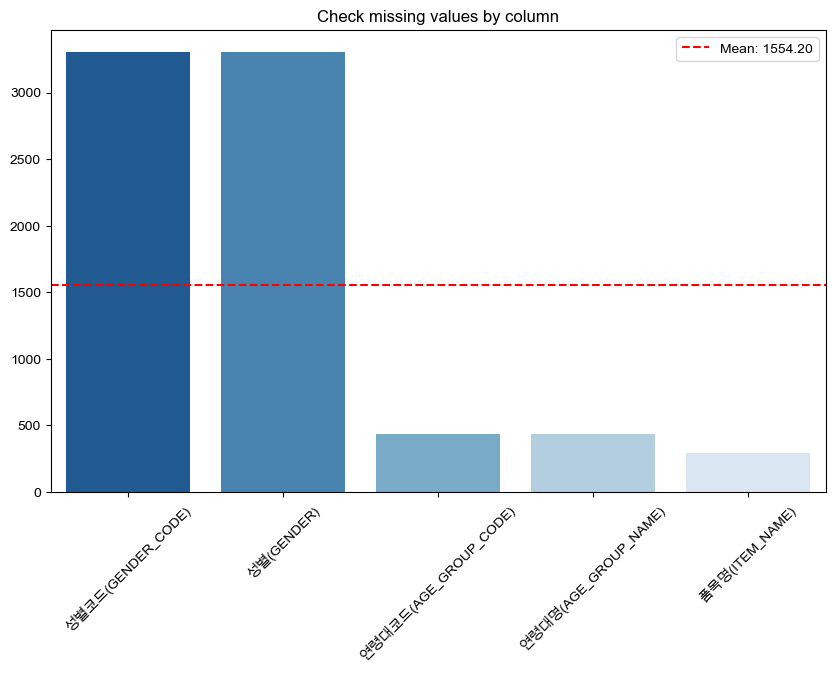

,Column,Count,Ratio(%)
0,성별코드(GENDER_CODE),3305,0.661001
1,성별(GENDER),3305,0.661001
2,연령대코드(AGE_GROUP_CODE),433,0.086600
3,연령대명(AGE_GROUP_NAME),433,0.086600
4,품목명(ITEM_NAME),295,0.059000


In [8]:
NaN_col = NaN_df[NaN_df['Count'] > 0 ] # 결측치 있는 컬럼만 필터
Visualizer.bar_plot(df=NaN_col, x_col='Column', y_col='Count', title='Check missing values ​​by column', rotation=45, show_mean=True)
NaN_col

In [9]:
# 결측치 있는 컬럼 중 교유값 조회
col_unique = NaN_col['Column'].tolist()
check_col = df[col_unique]

for col in check_col:
    print(f"{col} 고유값 수: {check_col[col].nunique()} \t{check_col[col].unique()}\n")

성별코드(GENDER_CODE) 고유값 수: 2 	[ 2.  1. nan]

성별(GENDER) 고유값 수: 2 	['여성' '남성' nan]

연령대코드(AGE_GROUP_CODE) 고유값 수: 11 	[ 3.  4.  5.  6. 11.  8. 12.  2.  9. 10. nan  1.]

연령대명(AGE_GROUP_NAME) 고유값 수: 11 	['20 - 29세' '30 - 39세' '40 - 49세' '50 - 59세' '60 - 64세' '70 - 79세'
 '65 - 69세' '10 - 19세' '불명' '80세이상' nan '10세 미만']

품목명(ITEM_NAME) 고유값 수: 1290 	['미용서비스' '침실세트' '영화관람' ... '서예용품' '훈제기' '케첩']



In [10]:
# 결측치 처리
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):  # 숫자형
        df[col] = df[col].fillna(-1)

    elif col == '성별(GENDER)': 
        df = df.dropna(subset=['성별(GENDER)']) # 성별 판별 불가 제거

    elif col == '연령대명(AGE_GROUP_NAME)': 
        df[col] = df[col].fillna('불명') # '불명' 으로 포함

    elif df[col].dtype == 'object': 
        df[col] = df[col].fillna('기타') # 기타 로 대체

# 확인
Check_Data_Type(df)        
Check_NaN(df)  

/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_34709/1119073259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(-1)
/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_34709/1119073259.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna('불명') # '불명' 으로 포함
/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_34709/1119073259.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Object Type Length: 8
Num Type Length: 5


,Column,Count,Ratio(%)
0,사건번호(ACCIDENT_NO),0,0.0
1,접수일자(RCPT_YMD),0,0.0
2,성별코드(GENDER_CODE),0,0.0
3,성별(GENDER),0,0.0
4,연령대코드(AGE_GROUP_CODE),0,0.0
5,연령대명(AGE_GROUP_NAME),0,0.0
6,지역코드(AREA_CODE),0,0.0
7,지역명(AREA_NAME),0,0.0
8,품목코드(ITEM_CODE),0,0.0
9,품목명(ITEM_NAME),0,0.0


In [11]:
df['접수일자(RCPT_YMD)'] = pd.to_datetime(df['접수일자(RCPT_YMD)']) # 시계열 변환
print(f"중복값 조회: {df['사건번호(ACCIDENT_NO)'].duplicated().sum()}") # 중복 조회

df.isna().sum() # 확인

중복값 조회: 0


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_34709/3651356553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['접수일자(RCPT_YMD)'] = pd.to_datetime(df['접수일자(RCPT_YMD)']) # 시계열 변환


사건번호(ACCIDENT_NO)            0
접수일자(RCPT_YMD)               0
성별코드(GENDER_CODE)            0
성별(GENDER)                   0
연령대코드(AGE_GROUP_CODE)        0
연령대명(AGE_GROUP_NAME)         0
지역코드(AREA_CODE)              0
지역명(AREA_NAME)               0
품목코드(ITEM_CODE)              0
품목명(ITEM_NAME)               0
사건제목(ACCIDENT_TITLE)         0
상담이유코드(DSCSN_REASON_CODE)    0
상담이유명(DSCSN_REASON_NAME)     0
dtype: int64

In [12]:
# 지역 확인
df['지역명(AREA_NAME)'].unique()

array(['안산시', '전라북도', '경기도', '구미시', '고양시', '종로구', '부천시', '화성시', '유성구',
       '서울특별시', '부평구', '군포시', '가평군', '평택시', '안양시', '성남시', '구로구', '남양주시',
       '양천구', '안동시', '수원시', '사천시', '천안시', '세종특별자치시', '시흥시', '포천시', '미추홀구',
       '동구', '전주시', '송파구', '경주시', '광산구', '연수구', '북구', '북아메리카', '광진구',
       '진천군', '영동군', '울주군', '마포구', '동작구', '강남구', '울산광역시', '담양군', '충청남도',
       '충청북도', '거제시', '포항시', '경상북도', '영등포구', '대구광역시', '연제구', '중구', '성북구',
       '중랑구', '삼척시', '서구', '남구', '인천광역시', '용인시', '함안군', '대전광역시', '광양시',
       '부산광역시', '광명시', '광주광역시', '김포시', '울진군', '상주시', '하남시', '해외 및 기타',
       '김해시', '마산시', '과천시', '남동구', '당진시', '청주시', '구리시', '양산시', '완주군',
       '창녕군', '창원시', '전라남도', '제주시', '경상남도', '은평구', '경산시', '장수군', '기장군',
       '강동구', '달서구', '부산진구', '강북구', '관악구', '광주시', '강릉시', '금천구', '노원구',
       '화순군', '양주시', '제천시', '해남군', '강화군', '동해시', '의왕시', '사하구', '의정부시',
       '서초구', '동래구', '군산시', '순천시', '보령시', '속초시', '서천군', '양평군', '수성구',
       '진주시', '제주특별자치도', '부여군', '성동구', '파주시', '해운대구', '횡성군', '서귀포시'

In [13]:
# rename column
df.columns = [col.split('(')[0].strip() for col in df.columns] # 한글명만 가져오기
dong = df[df['지역명'].str.endswith(('읍', '면', '동'))] # 읍, 면, 동 조회

country_name = ['북아메리카', '해외 및 기타', '유럽', '아프리카', '남아메리카', '오세아니아', '아시아']
country = df[df['지역명'].isin(country_name)]
df = df[~df['지역명'].isin(country_name)] # 국가 데이터 제거

print(f"읍, 면, 동 Data Length: {len(dong)}")
print(f"국가명 Data Length: {len(country)}")
print(df.shape[0])
df.head()

읍, 면, 동 Data Length: 0
국가명 Data Length: 7236
489458


,사건번호,접수일자,성별코드,성별,연령대코드,연령대명,지역코드,지역명,품목코드,품목명,사건제목,상담이유코드,상담이유명
0,2020-0000004,2020-01-01,2.0,여성,3.0,20 - 29세,812,안산시,390102,미용서비스,고객의 요구와 다른 색상의 염색약을 독단적으로 추가한 얼룩진 염색의 전액환불 및 재...,608,품질(물품/용역)
1,2020-0000025,2020-01-01,1.0,남성,4.0,30 - 39세,1200,전라북도,140505,침실세트,20200101_IN-TEST,602,약관
2,2020-0000026,2020-01-01,1.0,남성,5.0,40 - 49세,800,경기도,370306,영화관람,불합리한 영화 환불규정 관련 상담 건,611,계약해제.해지/위약금
3,2020-0000005,2020-01-01,2.0,여성,5.0,40 - 49세,1403,구미시,350104,항공여객운송서비스,마일리지 사용 제한,607,계약불이행(불완전이행)
4,2020-0000006,2020-01-01,2.0,여성,6.0,50 - 59세,801,고양시,210201,퍼스널컴퓨터,고지없이 정품 아닌 회사용 윈도우 설치된 회사용 컴 교체후 불편함과 고객센타의 불만...,608,품질(물품/용역)


In [14]:
# Load Data(area, code)
area = pd.read_csv('../data/국토교통부_전국 법정동_20240802.csv', encoding='EUC-kr')
area = area[['법정동코드', '시도명', '시군구명']].drop_duplicates(subset=['시도명', '시군구명']).reset_index(drop=True)
area['시도명코드'] = area['법정동코드'].astype(str).str[:2]  # 앞 2자리 (시도 코드)
area['시군구코드'] = area['법정동코드'].astype(str).str[:5]  # 앞 5자리 (시군구 코드)
order = ['법정동코드', '시도명', '시도명코드', '시군구명', '시군구코드'] # 순서 재배치
area = area[order]

# 지역 확인
print(f"지역 리스트: {area['시도명'].unique()}\n")
print(f"지역 개수: {area['시도명'].nunique()}")
area

지역 리스트: ['서울특별시' '부산직할시' '대구직할시' '인천직할시' '광주직할시' '대전직할시' '부산광역시' '대구광역시' '인천광역시'
 '광주광역시' '대전광역시' '울산광역시' '세종특별자치시' '경기도' '북부출장소' '강원도' '동해출장소' '충청북도'
 '충청남도' '전라북도' '전라남도' '경상북도' '경상남도' '제주도' '제주특별자치도' '강원특별자치도' '전북특별자치도']

지역 개수: 27


,법정동코드,시도명,시도명코드,시군구명,시군구코드
0,1100000000,서울특별시,11,NaN,11000
1,1111000000,서울특별시,11,종로구,11110
2,1114000000,서울특별시,11,중구,11140
3,1117000000,서울특별시,11,용산구,11170
4,1120000000,서울특별시,11,성동구,11200
...,...,...,...,...,...
512,5274000000,전북특별자치도,52,장수군,52740
513,5275000000,전북특별자치도,52,임실군,52750
514,5277000000,전북특별자치도,52,순창군,52770
515,5279000000,전북특별자치도,52,고창군,52790


In [15]:
area = area[~area['시도명'].str.endswith('직할시')]
area = area[~area['시도명'].isin(['제주도', '북부출장소', '동해출장소', '전라북도', '강원도'])] # 각 지역명이 변경됨: 강원도, 전라북도 > 특별자치도로 변경
area['시군구명'].fillna(area['시도명'], inplace=True)
print(f"지역 리스트: {area['시도명'].unique()}\n")
print(f"지역 개수: {area['시도명'].nunique()}")

area

지역 리스트: ['서울특별시' '부산광역시' '대구광역시' '인천광역시' '광주광역시' '대전광역시' '울산광역시' '세종특별자치시' '경기도'
 '충청북도' '충청남도' '전라남도' '경상북도' '경상남도' '제주특별자치도' '강원특별자치도' '전북특별자치도']

지역 개수: 17


,법정동코드,시도명,시도명코드,시군구명,시군구코드
0,1100000000,서울특별시,11,서울특별시,11000
1,1111000000,서울특별시,11,종로구,11110
2,1114000000,서울특별시,11,중구,11140
3,1117000000,서울특별시,11,용산구,11170
4,1120000000,서울특별시,11,성동구,11200
...,...,...,...,...,...
512,5274000000,전북특별자치도,52,장수군,52740
513,5275000000,전북특별자치도,52,임실군,52750
514,5277000000,전북특별자치도,52,순창군,52770
515,5279000000,전북특별자치도,52,고창군,52790


In [16]:
# 지역명 맵핑
df['지역명'] = df['지역명'].replace({'전라북도': '전북특별자치도', '강원도': '강원특별자치도', '북제주군': '제주시', '남제주군': '서귀포시'})
mapping_do = area.set_index('시군구명')['시도명'].to_dict() # 지역 매핑

# 지역명 컬럼을 기반 시도명, 시군구명 분리
df['시도명'] = df['지역명'].where(df['지역명'].isin(area['시도명']), None)
df['시군구명'] = df['지역명'].where(df['지역명'].isin(area['시군구명']), None)

df.loc[df['시도명'].isna() & df['시군구명'].notna(), '시도명'] = df['시군구명'].map(mapping_do) # 시도명이 없는 경우, 시군구명을 기준으로 시도명 매핑
df.loc[df['시군구명'] == df['시도명'], '시군구명'] = None 
df.loc[df['시군구명'].isna() & df['시도명'].notna(), '시군구명'] = '='  # "=" 표시

df

,사건번호,접수일자,성별코드,성별,연령대코드,연령대명,지역코드,지역명,품목코드,품목명,사건제목,상담이유코드,상담이유명,시도명,시군구명
0,2020-0000004,2020-01-01,2.0,여성,3.0,20 - 29세,812,안산시,390102,미용서비스,고객의 요구와 다른 색상의 염색약을 독단적으로 추가한 얼룩진 염색의 전액환불 및 재...,608,품질(물품/용역),경기도,안산시
1,2020-0000025,2020-01-01,1.0,남성,4.0,30 - 39세,1200,전북특별자치도,140505,침실세트,20200101_IN-TEST,602,약관,전북특별자치도,=
2,2020-0000026,2020-01-01,1.0,남성,5.0,40 - 49세,800,경기도,370306,영화관람,불합리한 영화 환불규정 관련 상담 건,611,계약해제.해지/위약금,경기도,=
3,2020-0000005,2020-01-01,2.0,여성,5.0,40 - 49세,1403,구미시,350104,항공여객운송서비스,마일리지 사용 제한,607,계약불이행(불완전이행),경상북도,구미시
4,2020-0000006,2020-01-01,2.0,여성,6.0,50 - 59세,801,고양시,210201,퍼스널컴퓨터,고지없이 정품 아닌 회사용 윈도우 설치된 회사용 컴 교체후 불편함과 고객센타의 불만...,608,품질(물품/용역),경기도,고양시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,2020-0587613,2020-10-12,1.0,남성,6.0,50 - 59세,1304,순천시,510115,실손보험,실손보험 관련 상담 받고 싶어 문의 함,616,단순문의.상담,전라남도,순천시
499995,2020-0587614,2020-10-12,2.0,여성,5.0,40 - 49세,100,서울특별시,140401,침대,침대 심의 문의,616,단순문의.상담,서울특별시,=
499996,2020-0587615,2020-10-12,2.0,여성,12.0,65 - 69세,800,경기도,140405,스프링매트리스,가구매매자엥서 구입 계약한 침대매트리스 해지시 위야금 지급 여부 문의,611,계약해제.해지/위약금,경기도,=
499997,2020-0587616,2020-10-12,2.0,여성,5.0,40 - 49세,1205,전주시,170103,어린이용한복,한복 구입후 반품 문의,608,품질(물품/용역),전북특별자치도,전주시


In [17]:
# 결측치 확인
nan = df[df['시도명'].isna()]
nan

,사건번호,접수일자,성별코드,성별,연령대코드,연령대명,지역코드,지역명,품목코드,품목명,사건제목,상담이유코드,상담이유명,시도명,시군구명
1260,2020-0001575,2020-01-02,1.0,남성,9.0,불명,9907,기타,210202,노트북컴퓨터,노트북 미배송,608,품질(물품/용역),None,None
2912,2020-0003301,2020-01-03,2.0,여성,9.0,불명,9907,기타,370403,종합체육시설회원권,펠라테스회원 취소시 위약금 문의,611,계약해제.해지/위약금,None,None
6929,2020-0008330,2020-01-06,2.0,여성,6.0,50 - 59세,9907,기타,299999,기타미분류물품,전화끊어짐 현상건.,616,단순문의.상담,None,None
7457,2020-0008989,2020-01-06,2.0,여성,9.0,불명,9907,기타,500599,기타상품,무릎보호대 반품 미비,608,품질(물품/용역),None,None
9015,2020-0010782,2020-01-07,2.0,여성,5.0,40 - 49세,9907,기타,200701,TV,TV. 구매후 하자 문의,608,품질(물품/용역),None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469742,2020-0551411,2020-09-16,1.0,남성,5.0,40 - 49세,9907,기타,500599,기타상품,산사태로 인한 피해 문의,603,가격.요금,None,None
475563,2020-0559315,2020-09-21,1.0,남성,9.0,불명,9907,기타,299999,기타미분류물품,포털 [카카오] 전자상거래 피해구제신청 - 한국소비자원/[기타 정보],616,단순문의.상담,None,None
487925,2020-0573390,2020-09-28,2.0,여성,11.0,60 - 64세,9907,기타,350104,항공여객운송서비스,해외거주중 서울화가조합이사장이 추진하는 여행비용 지불,611,계약해제.해지/위약금,None,None
488408,2020-0573898,2020-09-29,1.0,남성,5.0,40 - 49세,9907,기타,360303,기타이동통신,이동통신 제품 품질하자에 대한 AS 이행조치 요구,608,품질(물품/용역),None,None


In [18]:
# 최종 Data
df = df[df['지역코드'] != 9907] # 9907 이라는 지역코드가 없기에 제거
final_df = pd.merge(df, area, on=['시도명', '시군구명'], how='left')
final_df = final_df.drop(columns={'지역코드', '지역명', '법정동코드'})
final_df[['성별코드', '연령대코드']] = final_df[['성별코드', '연령대코드']].astype(int)

column_order = [
    '사건번호', '접수일자', '시도명코드', '시도명', '시군구코드', '시군구명', '성별코드', '성별', 
    '연령대코드', '연령대명', '품목코드', '품목명', '사건제목', '상담이유코드', '상담이유명']  

final_df = final_df[column_order]
final_df

,사건번호,접수일자,시도명코드,시도명,시군구코드,시군구명,성별코드,성별,연령대코드,연령대명,품목코드,품목명,사건제목,상담이유코드,상담이유명
0,2020-0000004,2020-01-01,41,경기도,41270,안산시,2,여성,3,20 - 29세,390102,미용서비스,고객의 요구와 다른 색상의 염색약을 독단적으로 추가한 얼룩진 염색의 전액환불 및 재...,608,품질(물품/용역)
1,2020-0000025,2020-01-01,NaN,전북특별자치도,NaN,=,1,남성,4,30 - 39세,140505,침실세트,20200101_IN-TEST,602,약관
2,2020-0000026,2020-01-01,NaN,경기도,NaN,=,1,남성,5,40 - 49세,370306,영화관람,불합리한 영화 환불규정 관련 상담 건,611,계약해제.해지/위약금
3,2020-0000005,2020-01-01,47,경상북도,47190,구미시,2,여성,5,40 - 49세,350104,항공여객운송서비스,마일리지 사용 제한,607,계약불이행(불완전이행)
4,2020-0000006,2020-01-01,41,경기도,41280,고양시,2,여성,6,50 - 59세,210201,퍼스널컴퓨터,고지없이 정품 아닌 회사용 윈도우 설치된 회사용 컴 교체후 불편함과 고객센타의 불만...,608,품질(물품/용역)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489260,2020-0587613,2020-10-12,46,전라남도,46150,순천시,1,남성,6,50 - 59세,510115,실손보험,실손보험 관련 상담 받고 싶어 문의 함,616,단순문의.상담
489261,2020-0587614,2020-10-12,NaN,서울특별시,NaN,=,2,여성,5,40 - 49세,140401,침대,침대 심의 문의,616,단순문의.상담
489262,2020-0587615,2020-10-12,NaN,경기도,NaN,=,2,여성,12,65 - 69세,140405,스프링매트리스,가구매매자엥서 구입 계약한 침대매트리스 해지시 위야금 지급 여부 문의,611,계약해제.해지/위약금
489263,2020-0587616,2020-10-12,52,전북특별자치도,52110,전주시,2,여성,5,40 - 49세,170103,어린이용한복,한복 구입후 반품 문의,608,품질(물품/용역)


## EDA

In [19]:
# groupby 함수
def group_by(df, target_col_1, sub_col, target_col_2=None, function=None, rename_col=None):
    # 단일 컬럼 & 다중 컬럼
    group_cols = [target_col_1] if target_col_2 is None else [target_col_1, target_col_2]
    if isinstance(sub_col, str):
        sub_col = [sub_col]

    if function is None:
        function = ['count', 'sum', 'mean', 'min', 'max']
    elif isinstance(function, str):  
        function = [function]  # 단일 문자열 입력 시 리스트로 변환

    df_group = df.groupby(group_cols)[sub_col].agg(function).reset_index()

    # 컬럼명 지정
    if rename_col:
        if isinstance(rename_col, str):  # 단일 컬럼명 변경
            df_group.columns = group_cols + [rename_col]
        elif isinstance(rename_col, list) and len(rename_col) == len(sub_col):  # 여러 개 컬럼명 변경
            df_group.columns = group_cols + rename_col
    else:
        df_group.columns = group_cols + sub_col # 기본 컬럼명 유지
    return df_group

- 월별 상담 건수 분석

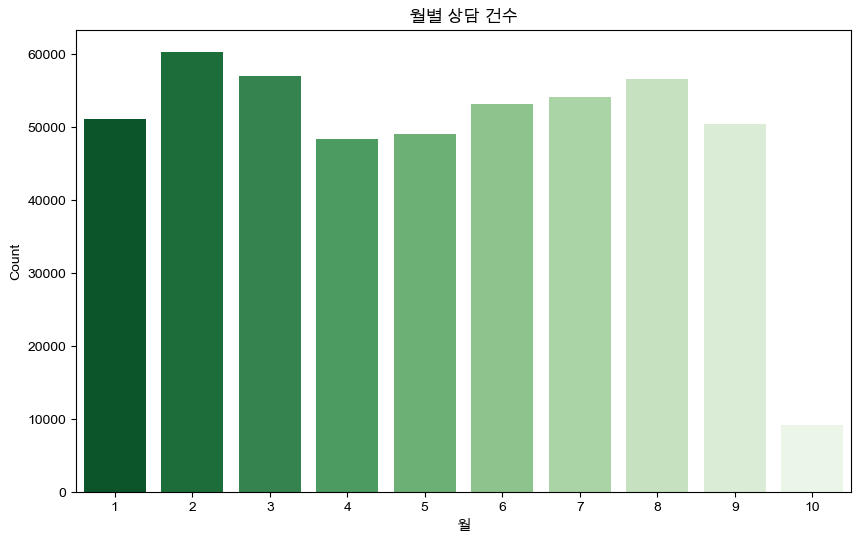

In [20]:
final_df['Month'] = final_df['접수일자'].dt.month
month_group = group_by(final_df, target_col_1='Month', sub_col='접수일자', function='count', rename_col='Count')

Visualizer.bar_plot(df=month_group, x_col='Month', y_col='Count', palette='Greens_r',  title='월별 상담 건수', xlabel='월', ylabel='Count') # 시각화

- 지역별 상담 건수 분석(시도명)

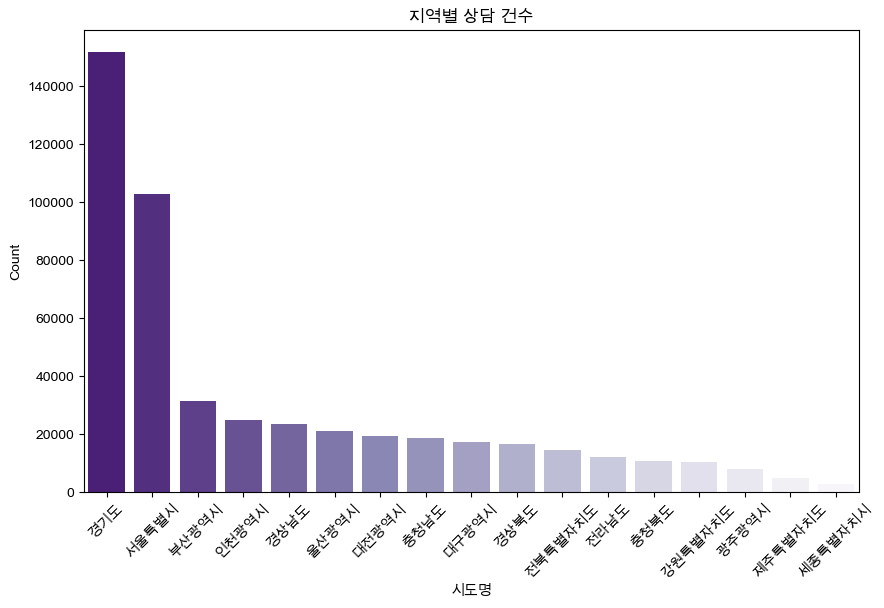

In [21]:
area_group = group_by(final_df, target_col_1='시도명', sub_col='사건번호', function='count', rename_col='Count')
area_group.sort_values(by=['Count'], ascending=False, inplace=True)
Visualizer.bar_plot(df=area_group, x_col='시도명', y_col='Count', palette='Purples_r',  title='지역별 상담 건수', xlabel='시도명', ylabel='Count', rotation=45) # 시각화

- TOP10 지역별 상담 건수 분석(시군구)

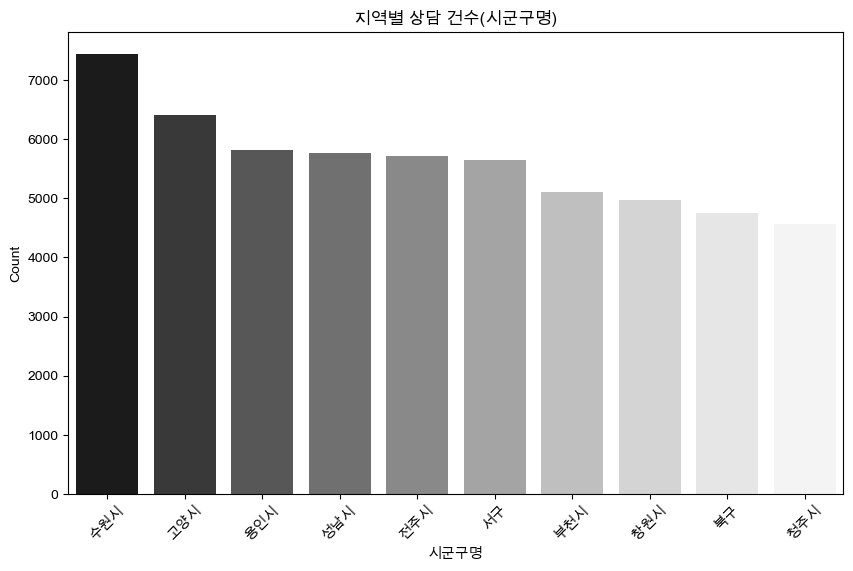

In [22]:
area_si = group_by(final_df, target_col_1='시군구명', sub_col='사건번호', function='count', rename_col='Count')
area_si = area_si[area_si['시군구명'] != '='] # = 제거
area_si = area_si.sort_values(by=['Count'], ascending=False).head(10)
Visualizer.bar_plot(df=area_si, x_col='시군구명', y_col='Count', palette='Greys_r',  title='지역별 상담 건수(시군구명)', xlabel='시군구명', ylabel='Count', rotation=45) # 시각화

- TOP 10 품목별 상담건수 분석 

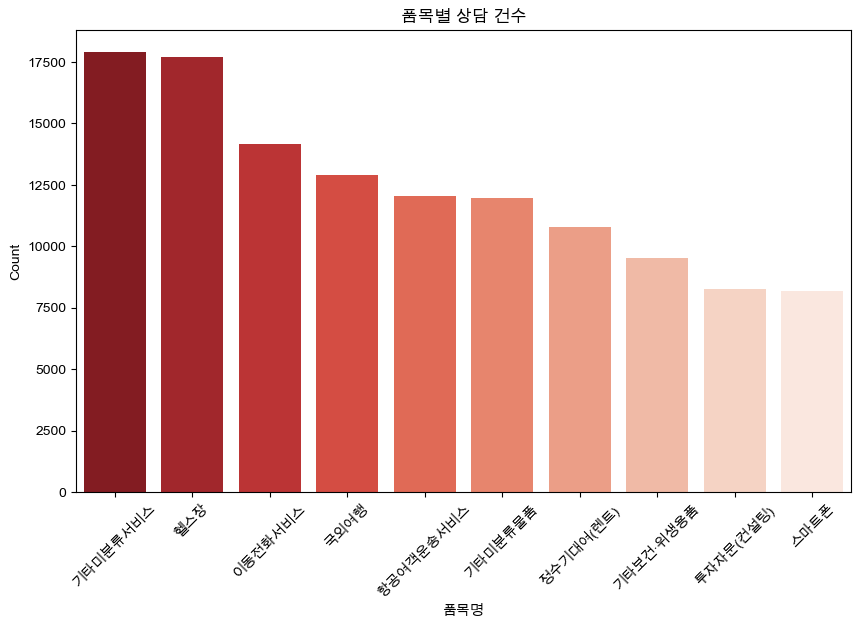

,품목명,Count
168,기타미분류서비스,17896
1244,헬스장,17709
881,이동전화서비스,14182
109,국외여행,12904
1226,항공여객운송서비스,12057
167,기타미분류물품,11972
1003,정수기대여(렌트),10787
175,기타보건·위생용품,9509
1158,투자자문(컨설팅),8272
669,스마트폰,8187


In [23]:
item_group = group_by(final_df, target_col_1='품목명', sub_col='사건번호', function='count', rename_col='Count')
item_group.sort_values(by=['Count'], ascending=False, inplace=True)
top_10_item = item_group.head(10)
Visualizer.bar_plot(df=top_10_item, x_col='품목명', y_col='Count', palette='Reds_r',  title='품목별 상담 건수', xlabel='품목명', ylabel='Count', rotation=45) # 시각화
top_10_item

- 월별 - 품목별 상담 건수 분석

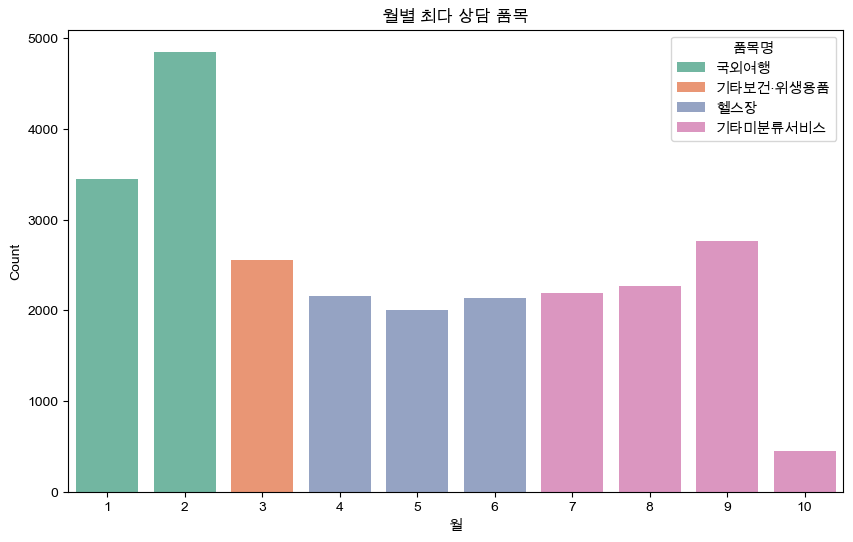

In [24]:
month_item_group = group_by(final_df, target_col_1='Month', target_col_2='품목명', sub_col='사건번호', function='count', rename_col='Count')
top_item_per_month = month_item_group.loc[month_item_group.groupby('Month')['Count'].idxmax()]

Visualizer.bar_plot(
    df=top_item_per_month,
    x_col='Month',
    y_col='Count',
    hue='품목명',
    palette='Set2',
    title='월별 최다 상담 품목',
    xlabel='월',
    ylabel='Count')

- 연령별 불만 유형 분석

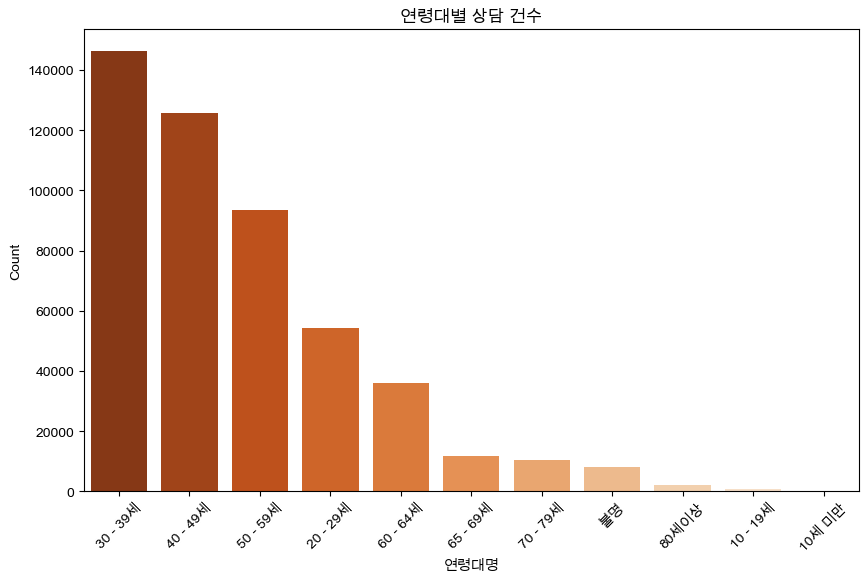

In [25]:
age_group = group_by(final_df, target_col_1='연령대명', sub_col='사건번호', function='count', rename_col='Count')
age_group.sort_values(by=['Count'], ascending=False, inplace=True)

Visualizer.bar_plot(df=age_group, x_col='연령대명', y_col='Count', palette='Oranges_r',  title='연령대별 상담 건수', xlabel='연령대명', ylabel='Count', rotation=45) # 시각화

- 연령별 - 품목별 상담 건수 분석

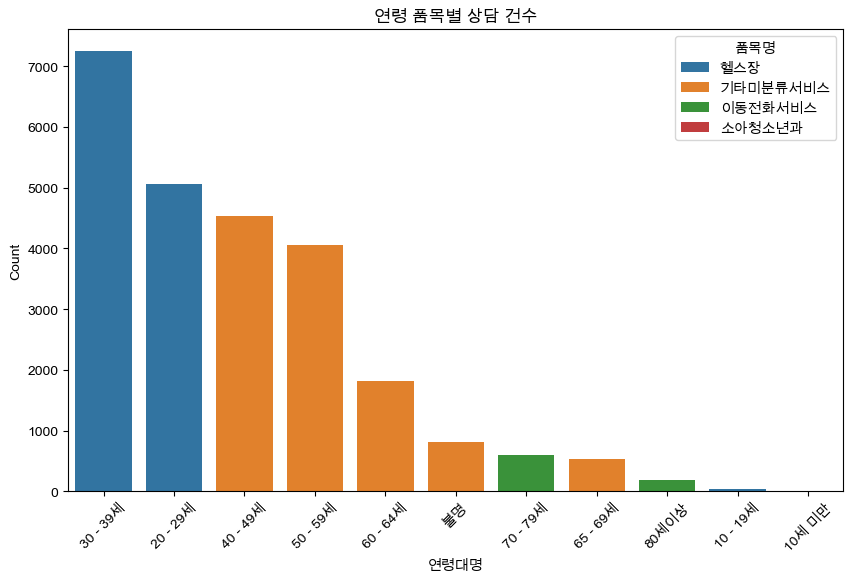

,연령대명,품목명,Count
2362,30 - 39세,헬스장,7244
1200,20 - 29세,헬스장,5053
2560,40 - 49세,기타미분류서비스,4528
3739,50 - 59세,기타미분류서비스,4050
4881,60 - 64세,기타미분류서비스,1818
7771,불명,기타미분류서비스,818
7060,70 - 79세,이동전화서비스,600
5857,65 - 69세,기타미분류서비스,530
7575,80세이상,이동전화서비스,181
229,10 - 19세,헬스장,41


In [26]:
age_item = group_by(final_df, target_col_1='연령대명', target_col_2='품목명', sub_col='사건번호', function='count', rename_col='Count')
top_age_item_month = age_item.loc[age_item.groupby('연령대명')['Count'].idxmax()]
top_age_item_month.sort_values(by=['Count'], ascending=False, inplace=True)

Visualizer.bar_plot(df=top_age_item_month, x_col='연령대명', y_col='Count', palette='tab10',  title='연령 품목별 상담 건수', xlabel='연령대명', ylabel='Count', rotation=45, hue='품목명') # 시각화
top_age_item_month

- 성별 별 상담 건수 분석

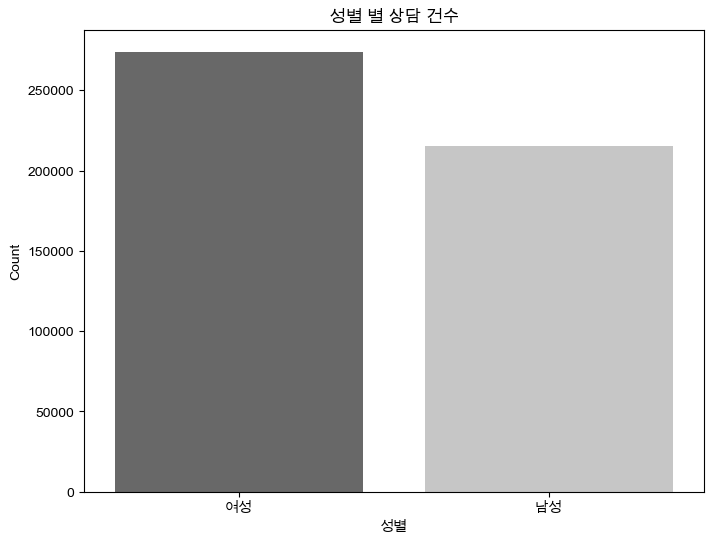

In [27]:
gender_group = group_by(final_df, target_col_1='성별', sub_col='사건번호', function='count', rename_col='Count')
gender_group.sort_values(by=['Count'], ascending=False, inplace=True)

Visualizer.bar_plot(df=gender_group, x_col='성별', y_col='Count', figsize=(8, 6), palette='Greys_r',  title='성별 별 상담 건수', xlabel='성별', ylabel='Count') # 시각화

- 성별 - 연령별 상담 건수 분석

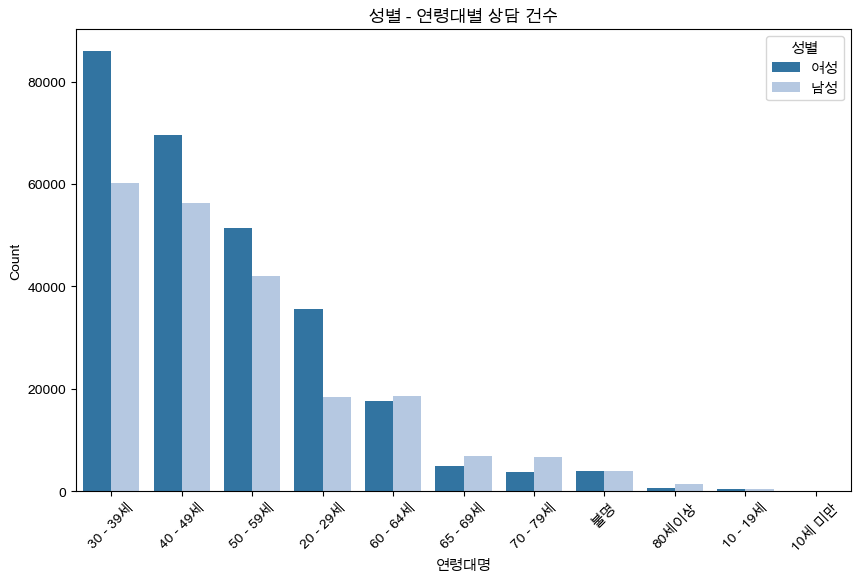

In [28]:
# 성별 & 연령대별 상담 건수 집계
age_gender_count = group_by(final_df, target_col_1='연령대명', target_col_2='성별', sub_col='사건번호', function='count', rename_col='Count')
age_gender_count.sort_values(by=['Count'], ascending=False, inplace=True)

# 시각화
Visualizer.bar_plot(
    df=age_gender_count, 
    x_col='연령대명', 
    y_col='Count', 
    hue='성별',  # 성별 차이 확인
    palette='tab20',  
    title='성별 - 연령대별 상담 건수',  
    xlabel='연령대명', 
    ylabel='Count', 
    rotation=45)

- 성별 - 품목별 상담 건수 분석

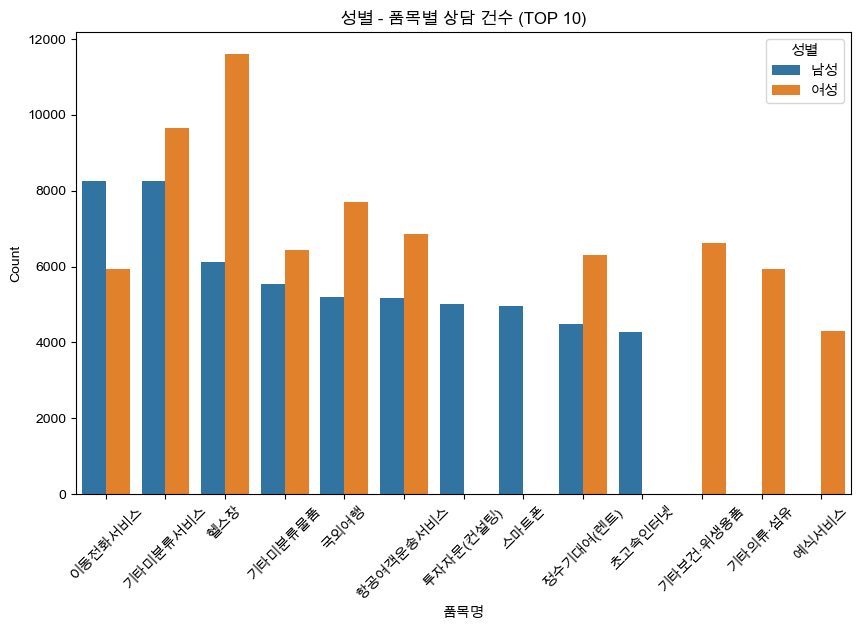

In [29]:
gender_item = group_by(final_df, target_col_1='성별', target_col_2='품목명', sub_col='사건번호', function='count', rename_col='Count')
top_gender_item = gender_item.groupby('성별').apply(lambda x: x.nlargest(10, 'Count')).reset_index(drop=True)

Visualizer.bar_plot(df=top_gender_item, x_col='품목명', y_col='Count', palette='tab10',  title='성별 - 품목별 상담 건수 (TOP 10)', xlabel='품목명', ylabel='Count', rotation=45, hue='성별') # 시각화